<div style="font-family: 'Segoe UI', sans-serif; line-height: 1.7; padding: 1.5em; background-color: #f9f9f9; border-left: 6px solid #023e8a;">
  <h2 style="color: #023e8a;">Introduction to the astropy library</h2>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week4/01_astropy_units_constants.ipynb)

  <p>
    astropy is a comprehensive, community-developed Python library designed to support <strong>professional-grade astronomical research and education</strong>. It serves as the foundation of the modern astronomical Python ecosystem, offering a coherent suite of tools that address the diverse computational needs of observational and theoretical astronomy.
  </p>

  <p>
    astropy was created in response to the growing need for <strong>standardized, well-maintained, and interoperable software</strong> within the astronomical community. Before astropy, researchers often relied on fragmented tools, legacy code, and ad hoc scripts, which complicated collaboration, reproducibility, and long-term maintenance. Today, astropy has become the <em>de facto</em> standard for Python-based astronomical computing and is widely adopted in both academic and institutional settings.
  </p>

  <p>
    At its core, astropy is built on principles of:
    <ul>
      <li><strong>Scientific accuracy</strong>: rigorously tested and validated tools for real-world applications</li>
      <li><strong>Reproducibility</strong>: enabling transparent workflows through unit tracking, metadata, and open standards</li>
      <li><strong>Interoperability</strong>: seamless integration with other scientific libraries (e.g., NumPy, SciPy, Matplotlib)</li>
      <li><strong>Modularity</strong>: individual subpackages designed for specific domains within astronomy</li>
      <li><strong>Community governance</strong>: an open model maintained by astronomers, for astronomers</li>
    </ul>
  </p>

  <p>
    The astropy library includes submodules for:
    <ul>
      <li>Physical units and quantities (<code>astropy.units</code>)</li>
      <li>Physical and astronomical constants (<code>astropy.constants</code>)</li>
      <li>Celestial coordinate transformations (<code>astropy.coordinates</code>)</li>
      <li>Time and calendar systems (<code>astropy.time</code>)</li>
      <li>FITS and tabular data I/O (<code>astropy.io</code>, <code>astropy.table</code>)</li>
      <li>World Coordinate System handling (<code>astropy.wcs</code>)</li>
      <li>Analytical modeling and fitting (<code>astropy.modeling</code>)</li>
      <li>Cosmological calculations (<code>astropy.cosmology</code>)</li>
      <li>Image visualization tools (<code>astropy.visualization</code>)</li>
    </ul>
  </p>

  <p style="background-color: #e0f0ff; padding: 0.8em; border-radius: 5px;">
    These components are tightly integrated and extensively documented, making astropy not only a powerful research toolkit but also an ideal platform for teaching astronomy and data analysis.
  </p>

</div>


**Note**
If you are running this jupyter notebook from Colab, then run the next cell by pressing `SHIFT+ENTER` to install the required packages for this notebook. Otherwise, skip the next cell.

In [ ]:
!pip install -q astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


## Units, Quantities, and Constants in astropy

Astronomical computations typically involve working with physical quantities expressed in various specialized units. Unlike standard SI units commonly used in physics, astronomers frequently employ historical and practical units such as **parsecs (pc)**, **astronomical units (AU)**, **solar masses (M⊙)**, **solar luminosities (L⊙)**, and flux units like **Jansky (Jy)**.

astropy provides three closely related components to simplify working with these diverse units and maintain scientific rigor:

### 1. Units (`astropy.units`)
Units represent physical measurement scales for example, parsecs, kilometers per second, or solar masses. astropy simplifies unit management by allowing easy conversions and ensuring dimensional consistency during calculations.

### 2. Quantities
A quantity combines a numerical value with its associated unit for instance, `10 pc` or `1.5 M⊙`. astropy’s quantity objects automatically handle unit tracking, ensuring consistency and minimizing calculation errors from manual conversions.

### 3. Constants (`astropy.constants`)
Constants represent fundamental physical parameters, such as the gravitational constant (`G`), speed of light (`c`), and solar mass (`M_sun`). astropy provides these constants pre-defined with precise numerical values and units, facilitating accurate and reliable astronomical computations.

Together, **Units**, **Quantities**, and **Constants** form a coherent framework in astropy, enabling astronomers to perform accurate, clear, and reproducible calculations. By embedding unit handling directly into computations, astropy promotes best practices in scientific programming, enhancing both clarity and reliability in astronomical analyses.


In [ ]:
from astropy import units as u

# Define simple quantities with units
distance = 1000 * u.km          # Distance in kilometers
velocity = 200 * u.km / u.s   # Velocity in kilometers per second

In this cell, we import the `astropy.units` module under the alias `u`, which provides access to a wide range of physical and astronomical units.

We then define two basic physical quantities:

- `distance = 1000 * u.km`: a distance of 10 kilometers.
- `velocity = 200 * u.km / u.s`: a velocity of 220 kilometers per second.

Each of these is an `astropy.units.Quantity` object, which stores both the numerical value and the physical unit. These objects can be used in calculations with automatic unit tracking and conversion.


In [ ]:
print(type(distance))
print(distance)
print(velocity)

<class 'astropy.units.quantity.Quantity'>
1000.0 km
200.0 km / s


In [ ]:
print(f"distance: {distance:.2f}")
print(distance.unit)
print(distance.value)
print(type(distance.value))

distance: 1000.00 km
km
1000.0
<class 'numpy.float64'>


In this cell, we printed several aspects of an `astropy.units.Quantity` object to explore its structure and its connection to NumPy:

- `print(f"distance: {distance:.2f}")`  
  Displays the quantity with its value rounded to two decimal places, including the unit (e.g., `10.00 km`).

- `print(distance.unit)`  
  Prints the unit component of the quantity (here: `km`).

- `print(distance.value)`  
  Prints just the numerical value, separate from the unit (here: `10.0`).

- `print(type(distance.value))`  
  Shows the type of the `.value` attribute. For a simple scalar, this is usually a NumPy float type (e.g., `<class 'numpy.float64'>`).

**Conclusion:**  
An `astropy.units.Quantity` object stores both the value and the unit, and its `.value` attribute is a NumPy type. This tight integration means you can use astropy quantities seamlessly with NumPy functions, combining the convenience of unit handling with the efficiency and flexibility of numerical array operations.


## astropy Units List
`Reference`: <https://docs.astropy.org/en/stable/units/ref_api.html#module-astropy.units>

### Length Units

| Unit     | Description        | Code Usage      |
|----------|--------------------|-----------------|
| `m`      | meter              | `u.m`           |
| `cm`     | centimeter         | `u.cm`          |
| `mm`     | millimeter         | `u.mm`          |
| `µm`     | micrometer         | `u.um`          |
| `nm`     | nanometer          | `u.nm`          |
| `km`     | kilometer          | `u.km`          |
| `au`     | astronomical unit  | `u.au`          |
| `pc`     | parsec             | `u.pc`          |
| `lyr`    | light-year         | `u.lyr`         |
| `R_sun`  | solar radius       | `u.R_sun`       |
| `R_earth`| earth radius       | `u.R_earth`     |
| `R_jup`  | jupiter radius     | `u.R_jup`       |
| `R_moon` | moon radius        | `u.R_moon`      |

### Time Units

| Unit   | Description    | Code Usage  |
|--------|----------------|-------------|
| `s`    | second         | `u.s`       |
| `ms`   | millisecond    | `u.ms`      |
| `µs`   | microsecond    | `u.us`      |
| `ns`   | nanosecond     | `u.ns`      |
| `min`  | minute         | `u.min`     |
| `h`    | hour           | `u.h`       |
| `day`  | day            | `u.day`     |
| `yr`   | Julian year    | `u.yr`      |
| `Gyr`  | gigayear       | `u.Gyr`     |

### Mass Units

| Unit     | Description      | Code Usage      |
|----------|------------------|-----------------|
| `kg`     | kilogram         | `u.kg`          |
| `g`      | gram             | `u.g`           |
| `mg`     | milligram        | `u.mg`          |
| `µg`     | microgram        | `u.ug`          |
| `u`      | atomic mass unit | `u.u`           |
| `M_sun`  | solar mass       | `u.M_sun`       |
| `M_earth`| earth mass       | `u.M_earth`     |
| `M_jup`  | jupiter mass     | `u.M_jup`       |
| `M_moon` | moon mass        | `u.M_moon`      |

### Temperature Units

| Unit     | Description       | Code Usage     |
|----------|-------------------|----------------|
| `K`      | kelvin            | `u.K`          |
| `deg_C`  | degree Celsius    | `u.deg_C`      |
| `deg_F`  | degree Fahrenheit | `u.deg_F`      |

### Energy and Power Units

| Unit    | Description           | Code Usage     |
|---------|-----------------------|----------------|
| `J`     | joule                 | `u.J`          |
| `erg`   | erg                   | `u.erg`        |
| `eV`    | electron volt         | `u.eV`         |
| `keV`   | kiloelectron volt     | `u.keV`        |
| `MeV`   | megaelectron volt     | `u.MeV`        |
| `GeV`   | gigaelectron volt     | `u.GeV`        |
| `W`     | watt                  | `u.W`          |
| `L_sun` | solar luminosity      | `u.L_sun`      |

### Velocity and Acceleration

| Unit    | Description               | Code Usage    |
|---------|---------------------------|---------------|
| `m/s`   | meters per second         | `u.m / u.s`   |
| `km/s`  | kilometers per second     | `u.km / u.s`  |
| `cm/s`  | centimeters per second    | `u.cm / u.s`  |
| `m/s²`  | meters per second squared | `u.m / u.s**2`|

### Volume and Area

| Unit   | Description               | Code Usage        |
|--------|---------------------------|-------------------|
| `m²`   | square meter              | `u.m**2`          |
| `cm²`  | square centimeter         | `u.cm**2`         |
| `km²`  | square kilometer          | `u.km**2`         |
| `AU²`  | square astronomical unit  | `u.au**2`         |
| `m³`   | cubic meter               | `u.m**3`          |
| `cm³`  | cubic centimeter          | `u.cm**3`         |
| `L`    | liter                     | `u.L`             |

### Frequency Units

| Unit   | Description    | Code Usage  |
|--------|----------------|-------------|
| `Hz`   | hertz          | `u.Hz`      |
| `kHz`  | kilohertz      | `u.kHz`     |
| `MHz`  | megahertz      | `u.MHz`     |
| `GHz`  | gigahertz      | `u.GHz`     |
| `THz`  | terahertz      | `u.THz`     |

### Electric Units

| Unit  | Description | Code Usage |
|-------|-------------|------------|
| `C`   | coulomb     | `u.C`      |
| `V`   | volt        | `u.V`      |
| `A`   | ampere      | `u.A`      |
| `ohm` | ohm         | `u.ohm`    |
| `S`   | siemens     | `u.S`      |
| `F`   | farad       | `u.F`      |
| `H`   | henry       | `u.H`      |
| `T`   | tesla       | `u.T`      |
| `Wb`  | weber       | `u.Wb`     |

### Radiation and Flux

| Unit            | Description               | Code Usage           |
|-----------------|---------------------------|----------------------|
| `Jy`            | jansky                    | `u.Jy`               |
| `photon`        | photon (dimensionless)    | `u.photon`           |
| `W/(m² Hz sr)`  | spectral radiance (SI)    | `u.W / (u.m**2 * u.Hz * u.sr)` |
| `erg/(s cm²)`   | flux in CGS               | `u.erg / (u.s * u.cm**2)`      |

### Angles and Solid Angles

| Unit    | Description | Code Usage  |
|---------|-------------|-------------|
| `deg`   | degree      | `u.deg`     |
| `rad`   | radian      | `u.rad`     |
| `arcmin`| arcminute   | `u.arcmin`  |
| `arcsec`| arcsecond   | `u.arcsec`  |
| `sr`    | steradian   | `u.sr`      |

### Miscellaneous and Dimensionless

| Unit                   | Description            | Code Usage              |
|------------------------|------------------------|--------------------------|
| `dimensionless_unscaled` | pure number          | `u.dimensionless_unscaled` |
| `dex`                  | logarithmic unit       | `u.dex`                 |
| `%`                    | percent                | `u.percent`             |
| `ppm`                  | parts per million      | `u.ppm`                 |
| `count`                | dimensionless count    | `u.count`               |


In [ ]:
distance_pc = u.Quantity(5, u.pc) #Just another way to define Quantity("Unit + Value")
print(type(distance_pc))          # Yes! Again Quantity class!
print(f"distance [pc]: {distance_pc:.2f}")

<class 'astropy.units.quantity.Quantity'>
distance [pc]: 5.00 pc


In [ ]:
speed_of_light = u.Quantity(1, u.lyr/u.year)
print(f"Speed of light [?]: {speed_of_light:.2f}")
print(f"Speed of light [km/s]: {speed_of_light.to(u.km/u.s):.2f}")    #Magic!

Speed of light [?]: 1.00 lyr / yr
Speed of light [km/s]: 299792.46 km / s


### Converting to Different Units

One of the most important features of `astropy.units.Quantity` objects is the ability to convert between compatible units using the `.to()` method.

A `Quantity` object represents a numerical value associated with a physical unit. If you need to express that value in another unit of the same physical dimension (for example, meters to kilometers, seconds to hours, or joules to electron-volts), the `.to()` method provides a simple and robust way to perform the conversion.

#### Basic Syntax:
```python
converted_quantity = original_quantity.to(new_unit)
```

#### Notes:
- The target unit (`new_unit`) must be **dimensionally compatible** with the original unit.
- If the target unit is not compatible (e.g., converting time to length), `astropy` will raise a `UnitsError`.

#### Example:
Suppose you define a distance of `1.5 * u.parsec`. You can convert it to light-years using:

```python
(1.5 * u.pc).to(u.lyr)
```

This returns a new `Quantity` object representing the same physical value expressed in light-years.

The `.to()` method ensures that your code remains physically meaningful and unit-consistent throughout your calculations.


In [ ]:
print(f"distance [pc]: {distance_pc:.2f}")
print(f"distance [mpc]: {distance_pc.to(u.mpc):.2f}") #It's not in our list but pc with "mega" or "kilo" others
print(f"distance [lyr]: {distance_pc.to(u.lyr):.2f}")
print(f"distance [AU]: {distance_pc.to(u.au):.2f}")
print(f"distance [R_sun]: {distance_pc.to(u.R_sun):.2f}")
print(f"distance [km]: {distance_pc.to(u.km):.2f}")
print(f"distance [mm]: {distance_pc.to(u.mm):.2f}") #How about nm ? Okay...
print(f"distance [pm]: {distance_pc.to(u.pm):.2f}") #YES! even picometer (pm) - metric unit of length equal to one trillionth of a meter! Let's stop here

distance [pc]: 5.00 pc
distance [mpc]: 5000.00 mpc
distance [lyr]: 16.31 lyr
distance [AU]: 1031324.03 AU
distance [R_sun]: 221767829.63 solRad
distance [km]: 154283879074568.38 km
distance [mm]: 154283879074568339456.00 mm
distance [pm]: 154283879074568357719543119872.00 pm


### Prefixes list
Source: <https://docs.astropy.org/en/stable/units/ref_api.html#module-astropy.units>

In [ ]:
distance_pc.to(u.s) #UnitsError

UnitConversionError: 'pc' (length) and 's' (time) are not convertible

In [ ]:
print(f"Speed of light [SI]: {speed_of_light.si:.2f}") #If you want some standarts
print(f"Speed of light [CGS]: {speed_of_light.cgs:.2f}")
print(f"Speed of light [custom value mm/ns]: {speed_of_light.to_value(u.mm/u.ns):.2f}") #Maybe you need just value in yor favorite units

Speed of light [SI]: 299792458.00 m / s
Speed of light [CGS]: 29979245800.00 cm / s
Speed of light [custom value mm/ns]: 299.79


## Constants

Now that we know how to define physical quantities with explicit units using `astropy.units`, the next logical step in writing physically meaningful code is to incorporate commonly used constants—such as the gravitational constant, the speed of light, or the mass of the Sun—directly into our calculations.

astropy simplifies this process through the dedicated subpackage [`astropy.constants`](https://docs.astropy.org/en/stable/constants/), which provides a rich collection of physical and astronomical constants, all implemented as fully unit-aware objects.

The constants in this module are not just hard-coded numbers; they are instances of `astropy.constants.Constant`, which means each one includes:
- a precise numerical value (as defined by CODATA or the IAU),
- a unit (compatible with the `astropy.units` system),
- a description, and
- support for seamless integration with other astropy subpackages.

This design ensures dimensional consistency and scientific correctness when constants are used in expressions, conversions, or calculations.

### Why Use `astropy.constants`?

Using the `astropy.constants` module offers several clear advantages:
- Accurate: All constants are based on the most recent and reliable scientific data.
- Built-in Units: Each constant is unit-aware and works seamlessly with quantities, unit conversions, and equations.
- Convenient: Constants are available by name—no need to memorize values or perform manual conversions.
- Consistent: Shared use of constants across notebooks, projects, and collaborators avoids mismatched assumptions.
- Readable: Code becomes more expressive and self-documenting when constants are used by name.

### What Types of Constants Are Included?

The module includes constants in several broad categories:

- **Physical constants**: Gravitational constant, Planck constant, speed of light, Boltzmann constant, elementary charge, and more.
- **Astronomical constants**: Solar mass, radius, and luminosity; parameters for Earth, Jupiter, and the Moon; astronomical unit; parsec; light-year, etc.
- **Radiative and atomic constants**: Wien’s displacement constant, Rydberg constant, Thomson cross-section, Stefan–Boltzmann constant, and others.

These constants are essential for research and computations in astrophysics, cosmology, planetary science, and observational astronomy.

---

In the next cell, you will find a complete table listing the most important constants available in `astropy.constants`, along with their values and units.


# astropy Constants (SI Units)

## Physical Constants

| Name     | Description                          | Value (SI)                    | Unit             |
|----------|--------------------------------------|-------------------------------|------------------|
| `G`      | Gravitational constant               | 6.67430e-11                   | m³ / (kg s²)     |
| `c`      | Speed of light in vacuum             | 2.99792458e8                  | m / s            |
| `h`      | Planck constant                      | 6.62607015e-34                | J s              |
| `ħ`      | Reduced Planck constant              | 1.054571817e-34               | J s              |
| `k_B`    | Boltzmann constant                   | 1.380649e-23                  | J / K            |
| `sigma_sb`| Stefan–Boltzmann constant           | 5.670374419e-8                | W / (m² K⁴)      |
| `a`      | Radiation density constant           | 7.5657e-16                    | J / (m³ K⁴)      |
| `R`      | Ideal gas constant                   | 8.314462618                   | J / (mol K)      |
| `N_A`    | Avogadro constant                    | 6.02214076e23                 | 1 / mol          |
| `e`      | Elementary charge                    | 1.602176634e-19               | C                |
| `m_e`    | Electron mass                        | 9.1093837015e-31              | kg               |
| `m_p`    | Proton mass                          | 1.67262192369e-27             | kg               |
| `m_n`    | Neutron mass                         | 1.67492749804e-27             | kg               |
| `mu_B`   | Bohr magneton                        | 9.2740100783e-24              | J / T            |
| `mu_N`   | Nuclear magneton                     | 5.0507837461e-27              | J / T            |
| `alpha`  | Fine-structure constant              | 7.2973525693e-3               | dimensionless    |
| `sigma_T`| Thomson scattering cross-section     | 6.6524587321e-29              | m²               |
| `eps0`   | Electric constant (vacuum permittivity) | 8.8541878128e-12           | F / m            |
| `mu0`    | Magnetic constant (vacuum permeability) | 1.25663706212e-6          | N / A²           |
| `atm`    | Standard atmosphere                  | 101325                        | Pa               |
| `g0`     | Standard gravity                     | 9.80665                       | m / s²           |
| `u`      | Atomic mass unit                     | 1.66053906660e-27             | kg               |
| `Ryd`    | Rydberg constant                     | 10973731.568160               | 1 / m            |
| `a0`     | Bohr radius                          | 5.29177210903e-11             | m                |
| `b_wien` | Wien wavelength displacement const.  | 2.897771955e-3                | m K              |

## Astronomical Constants

| Name       | Description                       | Value                         | Unit             |
|------------|-----------------------------------|-------------------------------|------------------|
| `M_sun`    | Solar mass                        | 1.98847e30                    | kg               |
| `R_sun`    | Solar radius                      | 6.957e8                       | m                |
| `L_sun`    | Solar luminosity                  | 3.828e26                      | W                |
| `M_earth`  | Earth mass                        | 5.9722e24                     | kg               |
| `R_earth`  | Earth radius (equatorial)         | 6.3781e6                      | m                |
| `R_jup`    | Jupiter radius                    | 7.1492e7                      | m                |
| `au`       | Astronomical unit                 | 1.495978707e11                | m                |
| `pc`       | Parsec                            | 3.085677581e16                | m                |
| `lyr`      | Light-year                        | 9.460730472e15                | m                |
| `kpc`      | Kiloparsec                        | 3.08567758e19                 | m                |
| `GM_earth` | Earth's gravitational parameter   | 3.986004e14                   | m³ / s²          |
| `GM_jup`   | Jupiter's gravitational parameter | 1.2668653e17                  | m³ / s²          |
| `GM_sun`   | Sun's gravitational parameter     | 1.3271244e20                  | m³ / s²          |
| `L_bol0`   | Luminosity at absolute bol. mag. 0| 3.0128e28                     | W                |


In [ ]:
from astropy.constants import c #First way to import
print(c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [ ]:
from astropy import constants as const #Second way to import
print(const.k_B)

  Name   = Boltzmann constant
  Value  = 1.380649e-23
  Uncertainty  = 0.0
  Unit  = J / K
  Reference = CODATA 2018


In [ ]:
print(c.to(u.pc/u.year)) #We can convert constants as other Quantities
print(const.c.cgs)

from IPython.display import Math, display
display(Math(f"{c:latex}")) #Some IPython and jupyter magic!

0.30660139378555057 pc / yr
29979245800.0 cm / s


<IPython.core.display.Math object>

## Example: Luminosity of a star-like object using the Stefan–Boltzmann law

This example demonstrates how `astropy.units` and `astropy.constants` work seamlessly together in realistic astrophysical computations.

We calculate the **total luminosity** $L$ of a hot, Jupiter-sized exoplanet using the **Stefan–Boltzmann law**:

$$
L = 4\pi R^2 \sigma T^4
$$

Here we define the planet’s:
- **radius** as 1.6 times the radius of Jupiter, and
- **effective temperature** as 1800 K.

We then use the built-in **Stefan–Boltzmann constant** from `astropy.constants` and compute the result with full unit support.

This example highlights:
- How to use physical constants and quantities with units in actual formulas,
- How units propagate through calculations automatically,
- And how to **compare the result** to another unit-aware constant, such as the Sun’s luminosity `L_sun`.

The final result is given in **watts** and as a **fraction of the solar luminosity**.


In [ ]:
from astropy.constants import sigma_sb, L_sun, R_jup
import numpy as np

radius = 1.6 * R_jup     # Define exoplanet radius
temperature = 1800 * u.K # Define effective temperature

luminosity = 4 * np.pi * radius**2 * sigma_sb * temperature**4 # Compute luminosity

print(f"Luminosity: {luminosity:.3e}")
print(f"As a fraction of solar luminosity: {(luminosity / L_sun).decompose():.4f}")

Luminosity: 9.787e+22 W
As a fraction of solar luminosity: 0.0003


### Wait! What does `.decompose()` do?

In the final line of the calculation, we compare the luminosity of our object to the luminosity of the Sun:

```python
(luminosity / L_sun).decompose()
```

This operation divides the computed luminosity (in watts) by the solar luminosity constant `L_sun`. The result is a **dimensionless `Quantity`**, because both values have the same physical unit.

However, the resulting object still retains unit information internally. Calling `.decompose()` simplifies the unit expression and **returns a pure number**, explicitly removing unit tags and expressing the result in terms of base SI units (or a dimensionless value, in this case).

This is especially useful when:
- You want a scalar value for plotting or formatting,
- You’re comparing dimensionless ratios,
- You want to confirm that the units cancel properly.

The output tells us **how many times more (or less)** luminous our object is compared to the Sun.


In [ ]:
g = 980 * u.cm / u.s**2
g_decomposed = g.decompose()
print(g_decomposed)  # meters instead of cm

9.8 m / s2


### Be careful when using `.decompose()` on Quantities with Units!

The `.decompose()` method in `astropy.units` simplifies a quantity by expressing its unit in terms of **base SI units** (or any system you specify). It does **not** remove units, but rewrites them in their most fundamental form.

This is different from `.to()` which converts to a specified target unit — `.decompose()` converts to **base units** automatically.

#### Example

Suppose we define a quantity with compound units, such as surface gravity

Here’s what happened:
- `980 cm / s²` is a valid unit,
- `.decompose()` rewrote it as `9.8 m / s²`, since meters are the SI base unit for length.

This is useful when:
- You want to check the **fundamental dimensional form** of a unit expression,
- You’re debugging complex formulas and want to ensure consistency,
- You’re comparing two quantities that may have **different-looking but equivalent units**.

#### Note

`.decompose()` will preserve the numeric value adjusted to match the new unit, and it will never return a unitless value **unless** the original expression is truly dimensionless.

If you want to extract a scalar number (i.e., remove units entirely), you can use `.value` after decomposing.


In [ ]:
unit = u.s**-1
alternative_units = unit.compose()
print(alternative_units) #Lits of possible units

[Unit("Hz"), Unit("Bq"), Unit("2.7027e-11 Ci")]


### Example: Interpreting `1 / s` with `.compose()`

The `.compose()` method allows us to rewrite a unit in terms of **known standard combinations** from physical sciences, making it easier to **understand the context** of a computation.

Let’s take the unit `1 / second`, which occurs in many physical situations (frequencies, decay rates, oscillations). While `1/s` is technically complete, `.compose()` helps us uncover the **physical meanings** it may represent.

#### What This Tells Us:

- `Hz` (hertz) is used for frequency — cycles per second.
- `Bq` (becquerel) is used for radioactive decay — disintegrations per second.
- `Ci` (curie), though not SI, is a legacy unit for activity (with a scaling factor).

These are **dimensionally identical**, but semantically distinct — and `.compose()` surfaces them all.

#### Summary

- `.compose()` helps **reveal context** by mapping abstract units like `1/s` to physical interpretations.
- This is particularly useful in education, debugging, or reporting results in specific domains (e.g., nuclear physics vs. signal processing).
- The method respects known units in the `astropy` system and returns all valid options.

You can further restrict the search using `system='si'`, `system='cgs'`, or a custom system to control the output.


## Working with `astropy.units` and NumPy Arrays

One of the powerful features of `astropy.units` is that it integrates smoothly with NumPy arrays, allowing you to perform **vectorized calculations** with **unit-aware data**.

This is especially useful in astronomy, where data often comes in arrays (e.g., lists of distances, velocities, fluxes). With `Quantity` objects, you can attach physical units directly to arrays, and all subsequent computations will correctly propagate units.


### Extending the Stefan–Boltzmann Law to Stellar Populations

In the previous example, we used the Stefan–Boltzmann law to calculate the luminosity of a single star based on its radius and effective temperature. However, in many astrophysical contexts — such as stellar population synthesis, HR diagram analysis, or galaxy modeling — we often deal with **large arrays of stars**.

Now, we extend the same physical principle to compute the luminosities of **multiple stars simultaneously**, each with its own temperature.

This demonstrates how:
- Units are preserved through element-wise operations,
- You can use `.to()` to convert the entire array of results,
- And unit consistency is automatically enforced — reducing the risk of mistakes.

In [ ]:
radii = 1 * u.R_sun         # stellar radii
temperatures = np.linspace(3000, 30000, 300) * u.K# effective temperatures
luminosities = 4 * np.pi * radii**2 * const.sigma_sb * temperatures**4 # Stefan–Boltzmann law
print(luminosities.to(u.L_sun)[0:10]) #Convert all array elements and show 10 elements

[0.07297577 0.08216688 0.09220002 0.10312509 0.11499347 0.12785794
 0.14177275 0.15679356 0.17297749 0.19038307] solLum


In [ ]:
np.mean(luminosities.to(u.L_sun)) #works with numpy

<Quantity 162.84502705 solLum>

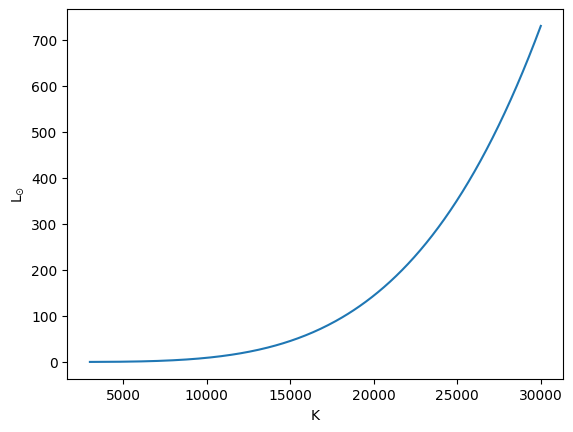

In [ ]:
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()

plt.plot(temperatures,luminosities.to(u.L_sun))

### Plotting with Astropy Quantities Using `quantity_support()`

In this plot, we directly visualize the relationship between stellar **effective temperature** and **luminosity** using `astropy.units.Quantity` objects without stripping their units.

To make this possible, we activate `astropy.visualization.quantity_support()` — a utility that allows **matplotlib** to understand and display physical units on axes automatically. This means we can pass `Quantity` arrays (like `temperatures` and `luminosities`) directly to `plt.plot()` without manual conversion.

#### What happens:

- The x-axis (temperature) is in Kelvin and comes directly from the `Quantity` array `temperatures`.
- The y-axis (luminosity) is converted to **solar luminosities** using `.to(u.L_sun)`, still as a `Quantity`.
- Units are automatically displayed on the axes (e.g., `[K]` and `[solLum]`).
- The plot shows a steep, nonlinear rise in luminosity with increasing temperature, following the Stefan–Boltzmann law:

$$
L = 4\pi R^2 \sigma T_{\text{eff}}^4
$$

This kind of unit-aware plotting is especially helpful in scientific workflows, as it preserves **dimensional clarity**, reduces errors, and makes your graphs **self-documenting**.



## Summary: astropy Units, Quantities, and Constants

This lesson introduced the foundational tools in `astropy` for working with physical units and constants in scientific and astrophysical calculations. The use of unit-aware computations ensures dimensional consistency, scientific clarity, and code reliability.

### Concepts Covered

- **Astropy Units (`astropy.units`)**
  - Assigning physical units to scalar values and arrays.
  - Performing arithmetic operations with automatic unit propagation.
  - Converting between compatible units using `.to()`.
  - Simplifying units into base SI using `.decompose()`.
  - Expressing units in familiar compound forms using `.compose()`.

- **Physical Quantities (`Quantity`)**
  - Combining numerical values with units to create `Quantity` objects.
  - Supporting NumPy-style vectorized operations on arrays of quantities.
  - Enabling scientific plotting directly with units using `quantity_support()`.

- **Astropy Constants (`astropy.constants`)**
  - Accessing predefined physical and astronomical constants.
  - Using constants with units in physical equations.
  - Ensuring precision and dimensional correctness in calculations.

- **Scientific Visualization**
  - Plotting quantities directly with axis labels showing physical units.
  - Creating meaningful astrophysical plots such as luminosity-temperature diagram.

### Additional features worth exploring

- **Equivalencies**  
  Enable conversions between units that are not dimensionally identical but are physically related (e.g., frequency ↔ wavelength ↔ energy, temperature ↔ energy).
    https://docs.astropy.org/en/stable/units/equivalencies.html

- **Custom Units**  
  Define domain-specific or institutional units for specialized applications.
    https://docs.astropy.org/en/stable/units/combining_and_defining.html

- **Unit Formatting**  
  Format units for LaTeX, Unicode, or plain text representations.
      https://docs.astropy.org/en/stable/units/format.html

## Assignment: Determining Stellar Distances from Parallax

In this task, you will compute the distances to nearby stars based on their **measured parallaxes** using `astropy.units`.

### Scientific Background

Stellar parallax is the apparent shift in a star's position due to Earth's orbit around the Sun. The distance \( d \) to a star in **parsecs** is inversely proportional to its parallax angle \( p \) in **arcseconds**:

$$
d = \frac{1}{p}
$$

Where:
- \( d \) — distance to the star (in parsecs),
- \( p \) — parallax angle (in arcseconds).

If the parallax is given in **milliarcseconds (mas)**, the formula becomes:

$$
d = \frac{1000}{p_{\text{mas}}}
$$

### Objective

- Convert observed parallaxes in **milliarcseconds** into distances in **parsecs**, **light-years**, and **AU**, using `astropy.units`.

---

### Given Data

| Star               | Parallax [mas] |
|--------------------|----------------|
| Proxima Centauri   | 768.5          |
| Alpha Centauri A   | 747.1          |
| Barnard's Star     | 548.3          |
| Wolf 359           | 419.1          |
| Lalande 21185      | 392.6          |
| Sirius A           | 379.2          |
| Luyten's Star      | 264.0          |
| Ross 154           | 336.0          |
| Epsilon Eridani    | 310.9          |
| Lacaille 9352      | 304.2          |

---

### Tasks

1. Convert parallax values (in milliarcseconds) to `Quantity` using `u.mas`.
2. Convert parallax to distance in **parsecs** using the inverse relationship.
3. Convert resulting distances to:
   - **light-years** using `.to(u.lyr)`
   - **astronomical units (AU)** using `.to(u.au)`


### Hint

You can either use the `.value` attribute to extract the number from a `Quantity`.
For a more elegant and unit-aware approach, you can apply an equivalency.
To learn more, see: https://docs.astropy.org/en/stable/units/equivalencies.html

## Part II: Interstellar travel time with Voyager-like speed

After computing distances to nearby stars from their parallaxes, estimate how long it would take a spacecraft traveling at Voyager 1’s speed (approximately 17 km/s) to reach them.

### Given

- Distance $d$ to each star (already computed from parallax)
- Voyager 1 speed:  
  $$v = 17\ \mathrm{km/s}$$

### Formula

The time $t$ required to travel distance $d$ is given by:

$$
t = \frac{d}{v}
$$


### Tasks

1. Use previously computed distances in **AU** or **parsecs** or even meters...
2. Convert Voyager's speed to an `astropy.Quantity`:

   $$v = 17\ \mathrm{km/s}$$

3. Compute $t = d / v$ using astropy units.
4. Express travel times in:
   - **years**
   - **millennia**
5. Compare the results with the current age of humanity and the age of civilization.